In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-03 20:20:40.163399: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 24s 769ms/step - accuracy: 0.1719 - loss: 1.9004
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1982 - loss: 1.8649 - val_accuracy: 0.2588 - val_loss: 1.7392
Epoch 2/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.2266 - loss: 1.8154
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2707 - loss: 1.7230 - val_accuracy: 0.3627 - val_loss: 1.5794
Epoch 3/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3203 - loss: 1.6552
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3099 - loss: 1.5991 - val_accuracy: 0.4122 - val_loss: 1.4389
Epoch 4/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.3281 - loss: 1.4807
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3469 - loss: 1.5043 - val_accuracy: 0.4875 - val_loss: 1.3410
Epoch 5/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.3281 - loss: 1.5494
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3749 - loss: 1.4509 - val_accuracy: 0.5634 - val_loss: 1.2768
Epoch 6/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.4453 - loss: 1.3944
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4052 - loss: 1.3989 - val_accuracy: 0.6122 - val_loss: 1.2129
Epoch 7/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5000 - loss: 1.2854
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4369 - loss: 1.3287 - val_accuracy: 0.7011 - val_loss: 1.1601
Epoch 8/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.4062 - loss: 1.3177
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4504 - loss: 1.3045 - val_accuracy: 0.7090 - val_loss: 1.1101
Epoch 9/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5078 - loss: 1.3002
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4694 - loss: 1.2772 - val_accuracy: 0.7269 - val_loss: 1.0738
Epoch 10/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4922 - loss: 1.3028
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4904 - loss: 1.2367 - val_accuracy: 0.7341 - val_loss: 1.0261
Epoch 11/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4688 - loss: 1.2869
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4869 - loss: 1.2452 - val_accuracy: 0.7441 - val_loss: 0.9903
Epoch 12/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5000 - loss: 1.2367
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5204 - loss: 1.1936 - val_accuracy: 0.7427 - val_loss: 0.9496
Epoch 13/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.4609 - loss: 1.2181
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5253 - loss: 1.1762 - val_accuracy: 0.7505 - val_loss: 0.9159
Epoch 14/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4922 - loss: 1.2730
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5368 - loss: 1.1530 - val_accuracy: 0.7821 - val_loss: 0.8878
Epoch 15/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5469 - loss: 1.0791
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5555 - loss: 1.1039 - val_accuracy: 0.7885 - val_loss: 0.8467
Epoch 16/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5312 - loss: 1.1810
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5684 - loss: 1.0951 - val_accuracy: 0.7971 - val_loss: 0.8325
Epoch 17/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5781 - loss: 1.0278
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5677 - loss: 1.0706 - val_accuracy: 0.8079 - val_loss: 0.8000
Epoch 18/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6016 - loss: 1.0607
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5821 - loss: 1.0694 - val_accuracy: 0.8079 - val_loss: 0.7756
Epoch 19/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5703 - loss: 1.1126
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5696 - loss: 1.0707 - val_accuracy: 0.8215 - val_loss: 0.7489
Epoch 20/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6484 - loss: 1.0309
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6031 - loss: 1.0435 - val_accuracy: 0.8287 - val_loss: 0.7249
Epoch 21/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6250 - loss: 1.0429
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6199 - loss: 1.0235 - val_accuracy: 0.8280 - val_loss: 0.7096
Epoch 22/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.5547 - loss: 1.0748
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6274 - loss: 0.9801 - val_accuracy: 0.8237 - val_loss: 0.6792
Epoch 23/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5781 - loss: 1.1291
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5994 - loss: 1.0102 - val_accuracy: 0.8287 - val_loss: 0.6696
Epoch 24/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6797 - loss: 0.9030
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6321 - loss: 0.9524 - val_accuracy: 0.8430 - val_loss: 0.6572
Epoch 25/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6641 - loss: 1.0304
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6284 - loss: 0.9807 - val_accuracy: 0.8530 - val_loss: 0.6315
Epoch 26/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6172 - loss: 0.9053
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6351 - loss: 0.9375 - val_accuracy: 0.8387 - val_loss: 0.6301
Epoch 27/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5859 - loss: 1.1321
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6289 - loss: 0.9785 - val_accuracy: 0.8595 - val_loss: 0.6074
Epoch 28/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6484 - loss: 0.8869
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6383 - loss: 0.9341 - val_accuracy: 0.8624 - val_loss: 0.6026
Epoch 29/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6328 - loss: 0.9229
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6403 - loss: 0.9175 - val_accuracy: 0.8595 - val_loss: 0.5936
Epoch 30/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6719 - loss: 0.9162
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6578 - loss: 0.9137 - val_accuracy: 0.8581 - val_loss: 0.5843
Epoch 31/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7109 - loss: 0.8320
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6492 - loss: 0.9077 - val_accuracy: 0.8746 - val_loss: 0.5587
Epoch 32/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6562 - loss: 0.8844
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6448 - loss: 0.9228 - val_accuracy: 0.8681 - val_loss: 0.5523
Epoch 33/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6641 - loss: 0.8829
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 0.9045 - val_accuracy: 0.8681 - val_loss: 0.5480
Epoch 34/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6484 - loss: 0.9648
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6735 - loss: 0.8738 - val_accuracy: 0.8738 - val_loss: 0.5303
Epoch 35/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6484 - loss: 0.8750
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6569 - loss: 0.8900 - val_accuracy: 0.8731 - val_loss: 0.5280
Epoch 36/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7031 - loss: 0.8195
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6711 - loss: 0.8615 - val_accuracy: 0.8875 - val_loss: 0.5299
Epoch 37/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6953 - loss: 0.7777
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6721 - loss: 0.8633 - val_accuracy: 0.8853 - val_loss: 0.5101
Epoch 38/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7344 - loss: 0.8044
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6699 - loss: 0.8649 - val_accuracy: 0.8882 - val_loss: 0.5079
Epoch 39/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6719 - loss: 0.8394
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6696 - loss: 0.8704 - val_accuracy: 0.9140 - val_loss: 0.5002
Epoch 40/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6562 - loss: 0.8669
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6641 - loss: 0.8588 - val_accuracy: 0.9140 - val_loss: 0.4900
Epoch 41/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7500 - loss: 0.7485
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6885 - loss: 0.8392 - val_accuracy: 0.9068 - val_loss: 0.4889
Epoch 42/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6875 - loss: 0.7884
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6807 - loss: 0.8418 - val_accuracy: 0.9219 - val_loss: 0.4719
Epoch 43/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.8076
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6812 - loss: 0.8441 - val_accuracy: 0.8918 - val_loss: 0.4797
Epoch 44/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.6797 - loss: 0.8441
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6925 - loss: 0.8181 - val_accuracy: 0.9032 - val_loss: 0.4700
Epoch 45/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6719 - loss: 0.9124
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6858 - loss: 0.8484 - val_accuracy: 0.9183 - val_loss: 0.4522
Epoch 46/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7031 - loss: 0.7359
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6810 - loss: 0.8329 - val_accuracy: 0.9097 - val_loss: 0.4598
Epoch 47/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7266 - loss: 0.8040
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6884 - loss: 0.8249 - val_accuracy: 0.9118 - val_loss: 0.4418
Epoch 48/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.6797 - loss: 0.8268
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7007 - loss: 0.8068 - val_accuracy: 0.9211 - val_loss: 0.4361
Epoch 49/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6641 - loss: 0.8165
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6851 - loss: 0.8077 - val_accuracy: 0.9262 - val_loss: 0.4274
Epoch 50/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6641 - loss: 0.9065
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7064 - loss: 0.7768 - val_accuracy: 0.9068 - val_loss: 0.4305
Epoch 51/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6406 - loss: 0.8923
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6973 - loss: 0.8240 - val_accuracy: 0.9219 - val_loss: 0.4247
Epoch 52/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7734 - loss: 0.6821
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7076 - loss: 0.7967 - val_accuracy: 0.9233 - val_loss: 0.4216
Epoch 53/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.6641 - loss: 0.8075
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7032 - loss: 0.7789 - val_accuracy: 0.9211 - val_loss: 0.4119
Epoch 54/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6328 - loss: 0.8429
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6920 - loss: 0.7965 - val_accuracy: 0.9211 - val_loss: 0.4155
Epoch 55/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6953 - loss: 0.7883
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7018 - loss: 0.7764 - val_accuracy: 0.9118 - val_loss: 0.4142
Epoch 56/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7734 - loss: 0.6601
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7175 - loss: 0.7745 - val_accuracy: 0.9211 - val_loss: 0.4021
Epoch 57/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6797 - loss: 0.8459
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7010 - loss: 0.7886 - val_accuracy: 0.9219 - val_loss: 0.4009
Epoch 58/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6719 - loss: 0.8037
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7049 - loss: 0.7908 - val_accuracy: 0.9326 - val_loss: 0.3913
Epoch 59/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6719 - loss: 0.7621
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7033 - loss: 0.7758 - val_accuracy: 0.9176 - val_loss: 0.4020
Epoch 60/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6953 - loss: 0.8579
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6945 - loss: 0.7928 - val_accuracy: 0.9204 - val_loss: 0.3871
Epoch 61/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6875 - loss: 0.7199
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7091 - loss: 0.7546 - val_accuracy: 0.9190 - val_loss: 0.3835
Epoch 62/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7188 - loss: 0.7438
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7239 - loss: 0.7428 - val_accuracy: 0.9369 - val_loss: 0.3698
Epoch 63/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6875 - loss: 0.7631
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7031 - loss: 0.7798 - val_accuracy: 0.9247 - val_loss: 0.3790
Epoch 64/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.6953 - loss: 0.7881
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7177 - loss: 0.7660 - val_accuracy: 0.9341 - val_loss: 0.3764
Epoch 65/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7578 - loss: 0.6268
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7275 - loss: 0.7342 - val_accuracy: 0.9326 - val_loss: 0.3654
Epoch 66/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6016 - loss: 0.9378
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7002 - loss: 0.7760 - val_accuracy: 0.9097 - val_loss: 0.3869
Epoch 67/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7656 - loss: 0.6733
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7199 - loss: 0.7416 - val_accuracy: 0.9276 - val_loss: 0.3590
Epoch 68/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6719 - loss: 0.7636
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7082 - loss: 0.7507 - val_accuracy: 0.9262 - val_loss: 0.3605
Epoch 69/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.7969 - loss: 0.6119
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7221 - loss: 0.7244 - val_accuracy: 0.9262 - val_loss: 0.3591
Epoch 70/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6250 - loss: 0.8570
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6973 - loss: 0.7642 - val_accuracy: 0.9262 - val_loss: 0.3582
Epoch 71/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7188 - loss: 0.7593
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7277 - loss: 0.7351 - val_accuracy: 0.9333 - val_loss: 0.3517
Epoch 72/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7891 - loss: 0.6772
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7206 - loss: 0.7373 - val_accuracy: 0.9211 - val_loss: 0.3607
Epoch 73/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7188 - loss: 0.7251
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7172 - loss: 0.7349 - val_accuracy: 0.9168 - val_loss: 0.3560
Epoch 74/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7734 - loss: 0.6629
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7278 - loss: 0.7230 - val_accuracy: 0.9233 - val_loss: 0.3530
Epoch 75/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6641 - loss: 0.7784
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7047 - loss: 0.7468 - val_accuracy: 0.9176 - val_loss: 0.3571
Epoch 76/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6562 - loss: 0.9253
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7125 - loss: 0.7515 - val_accuracy: 0.9247 - val_loss: 0.3425
Epoch 77/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7812 - loss: 0.6424
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7257 - loss: 0.7188 - val_accuracy: 0.9312 - val_loss: 0.3424
Epoch 78/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7422 - loss: 0.6824
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7209 - loss: 0.7212 - val_accuracy: 0.9312 - val_loss: 0.3463
Epoch 79/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7266 - loss: 0.6878
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.7126 - val_accuracy: 0.9247 - val_loss: 0.3396
Epoch 80/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7578 - loss: 0.7032
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7260 - loss: 0.7332 - val_accuracy: 0.9355 - val_loss: 0.3322
Epoch 81/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7344 - loss: 0.7598
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7196 - loss: 0.7343 - val_accuracy: 0.9312 - val_loss: 0.3320
Epoch 82/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7031 - loss: 0.7931
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7279 - loss: 0.7301 - val_accuracy: 0.9290 - val_loss: 0.3327
Epoch 83/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7891 - loss: 0.6641
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7359 - loss: 0.7158 - val_accuracy: 0.9384 - val_loss: 0.3303
Epoch 84/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.7188 - loss: 0.7172
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7368 - loss: 0.7034 - val_accuracy: 0.9319 - val_loss: 0.3306
Epoch 85/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6953 - loss: 0.7799
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7365 - loss: 0.7064 - val_accuracy: 0.9290 - val_loss: 0.3318
Epoch 86/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7422 - loss: 0.7099
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7294 - loss: 0.7115 - val_accuracy: 0.9204 - val_loss: 0.3396
Epoch 87/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6953 - loss: 0.7968
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7234 - loss: 0.7251 - val_accuracy: 0.9362 - val_loss: 0.3235
Epoch 88/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7422 - loss: 0.7221
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7235 - loss: 0.7063 - val_accuracy: 0.9297 - val_loss: 0.3184
Epoch 89/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6953 - loss: 0.7326
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7196 - loss: 0.7106 - val_accuracy: 0.9269 - val_loss: 0.3308
Epoch 90/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7422 - loss: 0.7463
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7313 - loss: 0.7203 - val_accuracy: 0.9290 - val_loss: 0.3159
Epoch 91/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7500 - loss: 0.6153
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7408 - loss: 0.6821 - val_accuracy: 0.9376 - val_loss: 0.3145
Epoch 92/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7500 - loss: 0.7152
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7466 - loss: 0.6877 - val_accuracy: 0.9434 - val_loss: 0.3064
Epoch 93/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7266 - loss: 0.7146
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7506 - loss: 0.6845 - val_accuracy: 0.9297 - val_loss: 0.3172
Epoch 94/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7734 - loss: 0.5523
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7390 - loss: 0.6879 - val_accuracy: 0.9319 - val_loss: 0.3197
Epoch 95/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.8047 - loss: 0.6321
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7429 - loss: 0.6932 - val_accuracy: 0.9391 - val_loss: 0.3082
Epoch 96/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7812 - loss: 0.5897
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7295 - loss: 0.7150 - val_accuracy: 0.9348 - val_loss: 0.3116
Epoch 97/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6641 - loss: 0.8762
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7253 - loss: 0.7114 - val_accuracy: 0.9369 - val_loss: 0.3132
Epoch 98/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7891 - loss: 0.6804
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7452 - loss: 0.6903 - val_accuracy: 0.9376 - val_loss: 0.3151
Epoch 99/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.6875 - loss: 0.7650
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7395 - loss: 0.6901 - val_accuracy: 0.9341 - val_loss: 0.3153
Epoch 100/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.6641 - loss: 0.8388
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7307 - loss: 0.7313 - val_accuracy: 0.9398 - val_loss: 0.3044
Epoch 101/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6875 - loss: 0.7295
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7434 - loss: 0.6885 - val_accuracy: 0.9419 - val_loss: 0.3024
Epoch 102/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7500 - loss: 0.7267
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7302 - loss: 0.7134 - val_accuracy: 0.9419 - val_loss: 0.2990
Epoch 103/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7344 - loss: 0.6867
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7269 - loss: 0.7100 - val_accuracy: 0.9405 - val_loss: 0.3053
Epoch 104/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6875 - loss: 0.7107
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7346 - loss: 0.6947 - val_accuracy: 0.9441 - val_loss: 0.3008
Epoch 105/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.6562 - loss: 0.8217
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7245 - loss: 0.7155 - val_accuracy: 0.9427 - val_loss: 0.2971
Epoch 106/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.7656 - loss: 0.6453
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7540 - loss: 0.6735 - val_accuracy: 0.9355 - val_loss: 0.3070
Epoch 107/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7109 - loss: 0.7053
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7525 - loss: 0.6496 - val_accuracy: 0.9398 - val_loss: 0.2966
Epoch 108/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6797 - loss: 0.6960
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7489 - loss: 0.6694 - val_accuracy: 0.9391 - val_loss: 0.3011
Epoch 109/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6875 - loss: 0.8398
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7170 - loss: 0.7301 - val_accuracy: 0.9204 - val_loss: 0.3094
Epoch 110/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7656 - loss: 0.6292
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7379 - loss: 0.6884 - val_accuracy: 0.9391 - val_loss: 0.2966
Epoch 111/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7422 - loss: 0.6003
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7445 - loss: 0.6691 - val_accuracy: 0.9254 - val_loss: 0.3082
Epoch 112/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7500 - loss: 0.6502
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7472 - loss: 0.6673 - val_accuracy: 0.9355 - val_loss: 0.2983
Epoch 113/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.7500 - loss: 0.6913
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7399 - loss: 0.7025 - val_accuracy: 0.9419 - val_loss: 0.2964
Epoch 114/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7344 - loss: 0.5761
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7210 - loss: 0.7037 - val_accuracy: 0.9355 - val_loss: 0.3015
Epoch 115/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7656 - loss: 0.6357
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7418 - loss: 0.6748 - val_accuracy: 0.9384 - val_loss: 0.3058
Epoch 116/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7031 - loss: 0.7790
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7327 - loss: 0.6963 - val_accuracy: 0.9376 - val_loss: 0.3007
Epoch 117/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7891 - loss: 0.6568
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7570 - loss: 0.6705 - val_accuracy: 0.9405 - val_loss: 0.2911
Epoch 118/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7891 - loss: 0.5949
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7668 - loss: 0.6429 - val_accuracy: 0.9376 - val_loss: 0.2950
Epoch 119/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7734 - loss: 0.5503
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7481 - loss: 0.6523 - val_accuracy: 0.9391 - val_loss: 0.2947
Epoch 120/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7500 - loss: 0.6837
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7362 - loss: 0.6835 - val_accuracy: 0.9362 - val_loss: 0.2947
Epoch 121/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8359 - loss: 0.5991
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7616 - loss: 0.6502 - val_accuracy: 0.9412 - val_loss: 0.2863
Epoch 122/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7656 - loss: 0.6596
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7487 - loss: 0.6716 - val_accuracy: 0.9384 - val_loss: 0.2928
Epoch 123/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7422 - loss: 0.6505
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7428 - loss: 0.6876 - val_accuracy: 0.9391 - val_loss: 0.2925
Epoch 124/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.6784
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7568 - loss: 0.6615 - val_accuracy: 0.9362 - val_loss: 0.2912
Epoch 125/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7812 - loss: 0.5779
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7535 - loss: 0.6560 - val_accuracy: 0.9427 - val_loss: 0.2800
Epoch 126/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7031 - loss: 0.7588
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7355 - loss: 0.6740 - val_accuracy: 0.9412 - val_loss: 0.2900
Epoch 127/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7500 - loss: 0.6472
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7447 - loss: 0.6603 - val_accuracy: 0.9398 - val_loss: 0.2830
Epoch 128/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7031 - loss: 0.7448
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7404 - loss: 0.6846 - val_accuracy: 0.9434 - val_loss: 0.2872
Epoch 129/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7812 - loss: 0.6309
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7576 - loss: 0.6633 - val_accuracy: 0.9427 - val_loss: 0.2932
Epoch 130/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7500 - loss: 0.6697
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7453 - loss: 0.6817 - val_accuracy: 0.9405 - val_loss: 0.2914
Epoch 131/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7812 - loss: 0.6414
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7561 - loss: 0.6461 - val_accuracy: 0.9405 - val_loss: 0.2909
Epoch 132/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7734 - loss: 0.5914
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7484 - loss: 0.6468 - val_accuracy: 0.9305 - val_loss: 0.3018
Epoch 133/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8281 - loss: 0.4682
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7447 - loss: 0.6727 - val_accuracy: 0.9434 - val_loss: 0.2862
Epoch 134/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7344 - loss: 0.6884
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7428 - loss: 0.6691 - val_accuracy: 0.9348 - val_loss: 0.2883
Epoch 135/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7500 - loss: 0.6801
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7441 - loss: 0.6778 - val_accuracy: 0.9412 - val_loss: 0.2873
Epoch 136/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7188 - loss: 0.7684
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7476 - loss: 0.6774 - val_accuracy: 0.9376 - val_loss: 0.2876
Epoch 137/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7500 - loss: 0.7094
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7433 - loss: 0.6755 - val_accuracy: 0.9369 - val_loss: 0.2880
Epoch 138/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7188 - loss: 0.7102
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7486 - loss: 0.6690 - val_accuracy: 0.9412 - val_loss: 0.2859
Epoch 139/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7656 - loss: 0.5957
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7594 - loss: 0.6372 - val_accuracy: 0.9398 - val_loss: 0.2808
Epoch 140/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7734 - loss: 0.6735
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.6676 - val_accuracy: 0.9384 - val_loss: 0.2870
Epoch 141/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7812 - loss: 0.6155
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7537 - loss: 0.6643 - val_accuracy: 0.9348 - val_loss: 0.2826
Epoch 142/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7578 - loss: 0.7795
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7553 - loss: 0.6649 - val_accuracy: 0.9441 - val_loss: 0.2729
Epoch 143/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7812 - loss: 0.6483
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7398 - loss: 0.6865 - val_accuracy: 0.9369 - val_loss: 0.2880
Epoch 144/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7969 - loss: 0.5834
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7732 - loss: 0.6325 - val_accuracy: 0.9419 - val_loss: 0.2839
Epoch 145/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7500 - loss: 0.6783
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7564 - loss: 0.6831 - val_accuracy: 0.9434 - val_loss: 0.2834
Epoch 146/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7500 - loss: 0.5995
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7630 - loss: 0.6275 - val_accuracy: 0.9412 - val_loss: 0.2819
Epoch 147/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.7969 - loss: 0.5627
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7667 - loss: 0.6345 - val_accuracy: 0.9434 - val_loss: 0.2731
Epoch 148/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.8047 - loss: 0.6053
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7607 - loss: 0.6410 - val_accuracy: 0.9462 - val_loss: 0.2776
Epoch 149/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7422 - loss: 0.6560
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7573 - loss: 0.6432 - val_accuracy: 0.9419 - val_loss: 0.2771
Epoch 150/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.7188 - loss: 0.6797
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7444 - loss: 0.6664 - val_accuracy: 0.9434 - val_loss: 0.2731
Epoch 151/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7422 - loss: 0.5976
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7521 - loss: 0.6469 - val_accuracy: 0.9405 - val_loss: 0.2809
Epoch 152/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7812 - loss: 0.6342
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7531 - loss: 0.6629 - val_accuracy: 0.9369 - val_loss: 0.2815
Epoch 153/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7891 - loss: 0.5207
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7596 - loss: 0.6369 - val_accuracy: 0.9462 - val_loss: 0.2696
Epoch 154/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7734 - loss: 0.6283
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7560 - loss: 0.6608 - val_accuracy: 0.9369 - val_loss: 0.2783
Epoch 155/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7188 - loss: 0.6693
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7580 - loss: 0.6513 - val_accuracy: 0.9405 - val_loss: 0.2768
Epoch 156/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7891 - loss: 0.5992
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7616 - loss: 0.6456 - val_accuracy: 0.9427 - val_loss: 0.2744
Epoch 157/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7812 - loss: 0.6310
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7594 - loss: 0.6581 - val_accuracy: 0.9427 - val_loss: 0.2680
Epoch 158/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7422 - loss: 0.7090
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7608 - loss: 0.6547 - val_accuracy: 0.9419 - val_loss: 0.2708
Epoch 159/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7656 - loss: 0.6054
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7659 - loss: 0.6463 - val_accuracy: 0.9412 - val_loss: 0.2740
Epoch 160/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7422 - loss: 0.7318
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7451 - loss: 0.6760 - val_accuracy: 0.9477 - val_loss: 0.2656
Epoch 161/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7500 - loss: 0.6570
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7711 - loss: 0.6447 - val_accuracy: 0.9462 - val_loss: 0.2668
Epoch 162/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.7266 - loss: 0.6385
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7582 - loss: 0.6403 - val_accuracy: 0.9376 - val_loss: 0.2711
Epoch 163/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7812 - loss: 0.5922
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7476 - loss: 0.6710 - val_accuracy: 0.9470 - val_loss: 0.2675
Epoch 164/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.7969 - loss: 0.5149
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7587 - loss: 0.6487 - val_accuracy: 0.9455 - val_loss: 0.2739
Epoch 165/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7031 - loss: 0.7686
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 0.6614 - val_accuracy: 0.9412 - val_loss: 0.2693
Epoch 166/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8516 - loss: 0.5745
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.6041 - val_accuracy: 0.9491 - val_loss: 0.2644
Epoch 167/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7422 - loss: 0.7349
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7608 - loss: 0.6485 - val_accuracy: 0.9484 - val_loss: 0.2592
Epoch 168/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6953 - loss: 0.7440
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.6616 - val_accuracy: 0.9405 - val_loss: 0.2790
Epoch 169/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7891 - loss: 0.6729
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7619 - loss: 0.6387 - val_accuracy: 0.9520 - val_loss: 0.2589
Epoch 170/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7422 - loss: 0.6928
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7571 - loss: 0.6639 - val_accuracy: 0.9419 - val_loss: 0.2734
Epoch 171/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.7422 - loss: 0.6906
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7743 - loss: 0.6263 - val_accuracy: 0.9405 - val_loss: 0.2734
Epoch 172/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7891 - loss: 0.6220
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7637 - loss: 0.6362 - val_accuracy: 0.9455 - val_loss: 0.2689
Epoch 173/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.7188 - loss: 0.6751
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7538 - loss: 0.6495 - val_accuracy: 0.9462 - val_loss: 0.2639
Epoch 174/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7344 - loss: 0.7229
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7633 - loss: 0.6378 - val_accuracy: 0.9398 - val_loss: 0.2642
Epoch 175/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7969 - loss: 0.5508
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7559 - loss: 0.6341 - val_accuracy: 0.9369 - val_loss: 0.2766
Epoch 176/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.7534
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 0.6593 - val_accuracy: 0.9427 - val_loss: 0.2634
Epoch 177/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.7656 - loss: 0.6807
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7644 - loss: 0.6336 - val_accuracy: 0.9434 - val_loss: 0.2673
Epoch 178/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7656 - loss: 0.6726
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7536 - loss: 0.6514 - val_accuracy: 0.9405 - val_loss: 0.2683
Epoch 179/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.8125 - loss: 0.5421
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7667 - loss: 0.6512 - val_accuracy: 0.9477 - val_loss: 0.2651
Epoch 180/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7891 - loss: 0.6827
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7683 - loss: 0.6432 - val_accuracy: 0.9362 - val_loss: 0.2766
Epoch 181/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7031 - loss: 0.6942
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7529 - loss: 0.6434 - val_accuracy: 0.9470 - val_loss: 0.2658
Epoch 182/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7969 - loss: 0.5889
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7590 - loss: 0.6498 - val_accuracy: 0.9441 - val_loss: 0.2698
Epoch 183/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7344 - loss: 0.6935
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7532 - loss: 0.6552 - val_accuracy: 0.9484 - val_loss: 0.2649
Epoch 184/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.7266 - loss: 0.6570
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7601 - loss: 0.6331 - val_accuracy: 0.9520 - val_loss: 0.2610
Epoch 185/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7656 - loss: 0.6736
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7630 - loss: 0.6388 - val_accuracy: 0.9391 - val_loss: 0.2774
Epoch 186/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7500 - loss: 0.6176
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7532 - loss: 0.6367 - val_accuracy: 0.9419 - val_loss: 0.2777
Epoch 187/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7500 - loss: 0.5929
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7525 - loss: 0.6470 - val_accuracy: 0.9412 - val_loss: 0.2742
Epoch 188/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8047 - loss: 0.5657
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7740 - loss: 0.6101 - val_accuracy: 0.9427 - val_loss: 0.2751
Epoch 189/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7266 - loss: 0.7068
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7480 - loss: 0.6754 - val_accuracy: 0.9484 - val_loss: 0.2672
Epoch 189: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9474 - loss: 0.2725 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[0.05372022 0.46569625 0.3031973  0.01296188 0.00255555 0.15842842
 0.00344038]
1


# Confusion matrix

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


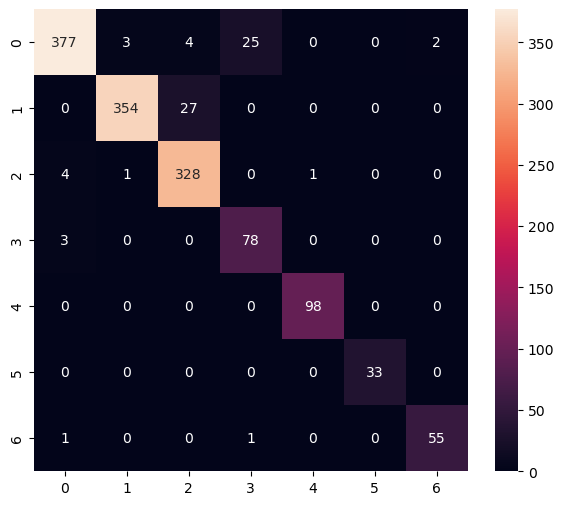

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       411
           1       0.99      0.93      0.96       381
           2       0.91      0.98      0.95       334
           3       0.75      0.96      0.84        81
           4       0.99      1.00      0.99        98
           5       1.00      1.00      1.00        33
           6       0.96      0.96      0.96        57

    accuracy                           0.95      1395
   macro avg       0.94      0.97      0.95      1395
weighted avg       0.95      0.95      0.95      1395



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp6hb1qpfc/assets


INFO:tensorflow:Assets written to: /tmp/tmp6hb1qpfc/assets


Saved artifact at '/tmp/tmp6hb1qpfc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  139765230935824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139765230934096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139765230932368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139765230931216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139765230933712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139765231538960: TensorSpec(shape=(), dtype=tf.resource, name=None)


2025-04-03 20:21:59.405383: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp6hb1qpfc
2025-04-03 20:21:59.405903: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-03 20:21:59.405913: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp6hb1qpfc
2025-04-03 20:21:59.448400: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-03 20:21:59.469623: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp6hb1qpfc
2025-04-03 20:21:59.475994: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 70613 microseconds.
2025-04-03 20:21:59.485948: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


6688

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 136 μs, total: 136 μs
Wall time: 125 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.05372022 0.46569636 0.3031972  0.01296188 0.00255555 0.15842845
 0.00344038]
1
